# Proyecto módulo 2: Portafolios de inversión

**Objetivo general:**

Aplicar herramientas del módulo dos además de complementar con funciones que investigamos, aplicado a el calculo de portafolios de inversión.

**Objetivos específicos:**

Utilizar simulación montecarlo para un determinado número de simulaciones.
Ir poco a poco conociendo librerías que son de apoyo para mostrar los datos y resultados de una mejor forma.
Relacionar conceptos de nuestra carrera con la materia.

**¿Qué es un portafolio de inversión?**

Se le conoce como portafolio o cartera de inversiones al conjunto de activos financieros que están en propiedad de un inversionista. Puede incluir bonos, acciones, monedas, efectivo, materias primas, productos derivados y muchos activos más.

**Modelo que representa el problema**

Seleccionaremos las acciones a incluir en el portafolio: GRUMA.MX, MEGACPO.MX, CUERVO.MX y la del IPC ^MXX
Tomamos los datos ajustados al cierre del día (un año, a partir del 4 de noviembre de 2019)
Asignamos cierto porcentaje de inversión a cada acción

In [29]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import datetime as date
import matplotlib.pyplot as plt
import pyfolio
import warnings

In [2]:
# Instalar estas librerias para poder ejecutar correctamente el portafolio de inversión.
# %pip install pandas_datareader
# %pip install pyfolio
# %pip install watermark

In [3]:
%load_ext watermark
%watermark
%watermark -p pandas_datareader,pandas,pyfolio

2020-11-12T00:29:17-06:00

CPython 3.8.3
IPython 7.16.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : AMD64 Family 23 Model 24 Stepping 1, AuthenticAMD
CPU cores  : 8
interpreter: 64bit
pandas_datareader 0.9.0
pandas 1.0.5
pyfolio 0.9.2


In [4]:
def get_Data(index):
    data = pdr.get_data_yahoo(index, start=startdate, end=enddate)
    return data

In [5]:
startdate = date.datetime(2019, 1, 1)
enddate = date.datetime(2020, 1, 1)

In [6]:
grumab = get_Data('GRUMAB.MX')
megacpo = get_Data("MEGACPO.MX")    #Acciones del portafolio
cuervo= get_Data("CUERVO.MX")
ipc = get_Data('^MXX')

grumab.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  223.000000  220.149994  221.869995  221.550003  406167.0   
2019-01-03  224.300003  220.100006  221.070007  222.009995  425984.0   
2019-01-04  223.889999  221.009995  222.600006  222.990005  495016.0   
2019-01-07  225.000000  220.259995  223.449997  224.199997  541695.0   
2019-01-08  227.020004  223.009995  226.000000  224.559998  377490.0   

             Adj Close  
Date                    
2019-01-02  210.278763  
2019-01-03  210.715347  
2019-01-04  211.645493  
2019-01-07  212.793915  
2019-01-08  213.135620

**Para cada acción de este portafolio, regresa una nueva columna, en la cual vas a dividir el cierre entre el cierre pero de la primera entrada.**

In [7]:
for stock in (grumab,megacpo,cuervo,ipc):
    stock['Returns'] = stock['Adj Close'] / stock['Adj Close'].iloc[0]  

In [8]:
grumab.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  223.000000  220.149994  221.869995  221.550003  406167.0   
2019-01-03  224.300003  220.100006  221.070007  222.009995  425984.0   
2019-01-04  223.889999  221.009995  222.600006  222.990005  495016.0   
2019-01-07  225.000000  220.259995  223.449997  224.199997  541695.0   
2019-01-08  227.020004  223.009995  226.000000  224.559998  377490.0   

             Adj Close   Returns  
Date                              
2019-01-02  210.278763  1.000000  
2019-01-03  210.715347  1.002076  
2019-01-04  211.645493  1.006500  
2019-01-07  212.793915  1.011961  
2019-01-08  213.135620  1.013586

**Invertir el 20% de nuestro dinero en grumab, otro 20% en megacpo, 40% en cuervo, y por ultimo 20% en ipc.**


**Y multiplicamos los porcentajes por los retornos**

In [9]:
for stock, allocation in zip((grumab,megacpo,cuervo,ipc),[.2,.2,.4,.2]):
    stock['Allocation'] = stock['Returns'] * allocation

grumab.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  223.000000  220.149994  221.869995  221.550003  406167.0   
2019-01-03  224.300003  220.100006  221.070007  222.009995  425984.0   
2019-01-04  223.889999  221.009995  222.600006  222.990005  495016.0   
2019-01-07  225.000000  220.259995  223.449997  224.199997  541695.0   
2019-01-08  227.020004  223.009995  226.000000  224.559998  377490.0   

             Adj Close   Returns  Allocation  
Date                                          
2019-01-02  210.278763  1.000000    0.200000  
2019-01-03  210.715347  1.002076    0.200415  
2019-01-04  211.645493  1.006500    0.201300  
2019-01-07  212.793915  1.011961    0.202392  
2019-01-08  213.135620  1.013586    0.202717

**Invertimos 50,000 en este portafolio.**

**Y creamos una columna que multiplique allocation por el dinero a invertir**

In [10]:
for stock in (grumab,megacpo,cuervo,ipc):
    stock['Position'] = stock['Allocation'] * 50000

grumab.head()

High         Low        Open       Close    Volume  \
Date                                                                   
2019-01-02  223.000000  220.149994  221.869995  221.550003  406167.0   
2019-01-03  224.300003  220.100006  221.070007  222.009995  425984.0   
2019-01-04  223.889999  221.009995  222.600006  222.990005  495016.0   
2019-01-07  225.000000  220.259995  223.449997  224.199997  541695.0   
2019-01-08  227.020004  223.009995  226.000000  224.559998  377490.0   

             Adj Close   Returns  Allocation      Position  
Date                                                        
2019-01-02  210.278763  1.000000    0.200000  10000.000000  
2019-01-03  210.715347  1.002076    0.200415  10020.762176  
2019-01-04  211.645493  1.006500    0.201300  10064.996090  
2019-01-07  212.793915  1.011961    0.202392  10119.610366  
2019-01-08  213.135620  1.013586    0.202717  10135.860477

**Creamos el portafolio, y concatenamos las posiciones en el axis uno que es la fecha.**

In [11]:
portafolio = pd.concat([grumab['Position'],megacpo['Position'],cuervo['Position'],ipc['Position']], axis=1)
portafolio.columns = ['GRUMAB.MX','MEGACPO.MX','CUERVO.MX','IPC']
portafolio.head()

GRUMAB.MX    MEGACPO.MX     CUERVO.MX           IPC
Date                                                              
2019-01-02  10000.000000  10000.000000  20000.000000  10000.000000
2019-01-03  10020.762176   9992.252376  19977.528128   9946.341568
2019-01-04  10064.996090   9822.911070  20269.662464  10043.525743
2019-01-07  10119.610366   9944.660211  19940.074516  10133.201656
2019-01-08  10135.860477   9852.795144  19895.130772  10300.850758

**Creamos una serie que viene siendo la suma de todos los anteriores para poder obsrvar el portafolio total.**

In [12]:
portafolio_total = portafolio.sum(axis=1)
portafolio_total.head()

Date
2019-01-02    50000.000000
2019-01-03    49936.884248
2019-01-04    50201.095367
2019-01-07    50137.546749
2019-01-08    50184.637151
dtype: float64

**Graficamos el rendimiento del portafolio en 1 año.**

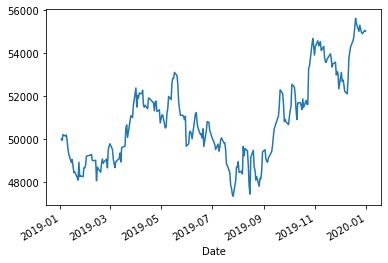

In [13]:
portafolio_total.plot()
plt.show()

**Graficamos el rendimiento de cada acción.**

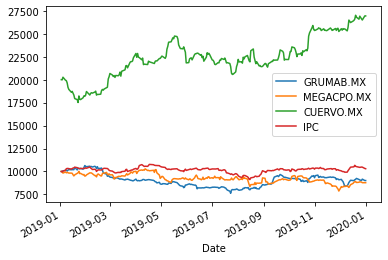

In [14]:
portafolio.plot()
plt.show()

**Calculamos los retornos diarios.**

In [15]:
portafolio_returns = portafolio_total.pct_change().dropna()
portafolio_returns.head()

Date
2019-01-03   -0.001262
2019-01-04    0.005291
2019-01-07   -0.001266
2019-01-08    0.000939
2019-01-09   -0.005284
dtype: float64

**Esta función es parte de la libreria de pyfolio, pero presenta un error por la version que no es compatible con la version de la libreria empyrical. Lo tratamos de corregir cambiando las versiones pero el error se siguio presentando.**

In [16]:
benchmark = ipc['Adj Close']
bench = benchmark.pct_change().dropna()
bench.rename('Benchmark IPC')
%matplotlib inline

# silence warnings

warnings.filterwarnings('ignore')

pyfolio.create_returns_tear_sheet(portafolio_returns)

AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

**Creamos los retornos logarítmicos para mayor presición.**

In [17]:
retlog=np.log(portafolio / portafolio.shift(1)).dropna()
print(retlog.head())

            GRUMAB.MX  MEGACPO.MX  CUERVO.MX       IPC
Date                                                  
2019-01-03   0.002074   -0.000775  -0.001124 -0.005380
2019-01-04   0.004405   -0.017093   0.014517  0.009723
2019-01-07   0.005411    0.012318  -0.016394  0.008889
2019-01-08   0.001605   -0.009281  -0.002256  0.016409
2019-01-09  -0.008856    0.004707  -0.012503  0.002413


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FE3550040>,
      dtype=object)

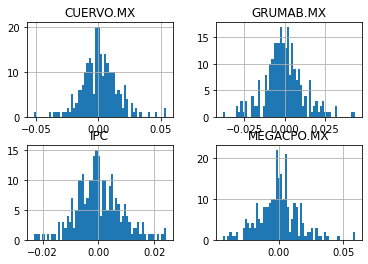

In [18]:
retlog.hist(bins=60)

In [19]:
mu=retlog.mean()
std=retlog.std()

In [20]:
def simP(dato,start,ndays,N):
    R=dato.pct_change()
    mu=R.mean()
    std=R.std()
    Rsimulada=np.random.normal(mu,std,(ndays,N))
    fecha=pd.date_range(start,periods=ndays)
    RsimDF=pd.DataFrame(index=fecha,data=Rsimulada)
    Pproyectados=dato[-1]*(RsimDF+1).cumprod()      #Proyección precios proyectados
    return Pproyectados

**Sacamos media anualizada, 252 días porque son los días que trabaja la bolsa en un año.**

In [21]:
mu = retlog.mean() * 252
print(mu)

GRUMAB.MX    -0.104868
MEGACPO.MX   -0.131522
CUERVO.MX     0.300521
IPC           0.029836
dtype: float64


**Sacamos la covarianza de la misma forma.**

In [22]:
covariance = retlog.cov() *252
print(covariance)

            GRUMAB.MX  MEGACPO.MX  CUERVO.MX       IPC
GRUMAB.MX    0.036780    0.006607   0.005454  0.010631
MEGACPO.MX   0.006607    0.062512   0.009344  0.011965
CUERVO.MX    0.005454    0.009344   0.051515  0.004263
IPC          0.010631    0.011965   0.004263  0.016819


**Sacamos los pesos y los normalizamos a 1, para que la suma de estos sea igual a 1.**

In [23]:
weights = np.random.random(4)
print(weights)
weights = weights / np.sum(weights)
print(weights.sum())

[0.96842126 0.27616015 0.37960063 0.99388331]
0.9999999999999998


**Formula para los retornos esperados del portafolio, que es el promedio ponderado de los retronos para cada uno de nuestras acciones.**

$$E(\mathcal{R_p})\sum_{j=1}^{m}w_jE(\mathcal{R_j})$$

**Retorno esperado es igual a la suma de la media de nuestros retornos por los pesos correspondientes anualizados.**

In [24]:
exp_ret = np.sum(retlog.mean() * weights) *252
print(exp_ret)

0.0022359395524160393


**Producto punto de la transpuesta de los precios, por el producto punto de la covarianza anualizada, por los pesos.**

In [25]:
exp_cov = np.dot(weights.T, np.dot(retlog.cov() * 252, weights))
print(exp_cov)

0.015034499761563784


**Calculamos la desviación estádnar (volatilidad), que es la raiz cuadrada de nuestra covarianza.**

In [26]:
exp_std = np.sqrt(np.dot(weights.T, np.dot(retlog.cov() * 252, weights)))
print(exp_std)

0.12261525093382056


**Hacemos la simulación montecarlo, para simular o pronesticar un modelo.**

In [27]:
pretlog = []    #Lista vacia para los retornos.
pvols = []      #Lista vacia las volatilidades.

for p in range(4000):
    weights = np.random.random(4)    #Pesos aleatorios
    weights /= np.sum(weights)       #Pesos aleatorios
    pretlog.append(np.sum(retlog.mean() * weights) *252)      #Agregamos a la lista vacia de retorno, los retornos.
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(retlog.cov() * 252, weights)))) #Y las volatilidades

prets = np.array(pretlog)  #Las listas vacias las convertimos en arreglos.
pvols = np.array(pvols)    #

print(pretlog[:5])  #Imprimimos los primeros 5 retornos.
print(pvols[:5])    #Imprimimos los primeros 5 volatilidades.

[0.18435989073200906, 0.08282309231693874, 0.05809664105137575, -0.035059104634041445, 0.028130113708757398]
[0.16681935 0.14169972 0.1222786  0.14060364 0.14968966]


**Sharpe ratio**

El Sharpe Ratio es la medida de rentabilidad ajustada a la volatilidad (riesgo) de una cartera de inversiones. Una cartera con un mayor Sharpe Ratio se considera superior en relación con sus pares. La medida fue nombrada en honor a William F. Sharpe, un premio Nobel y profesor de finanzas en la Universidad de Stanford.

**Esta es una metrica la cual se calcula, con el retorno esperado de nuestro portafolio, sobre la desviación estándar de nuestro portafolio.**

**Se suele utilizar pra ver como un portafolio con las mismas acciones dependiendo de las allocation(cantidad a invertir en cada acción),puede tener diferentes metricas de riesgo(diferente volatilidad).**

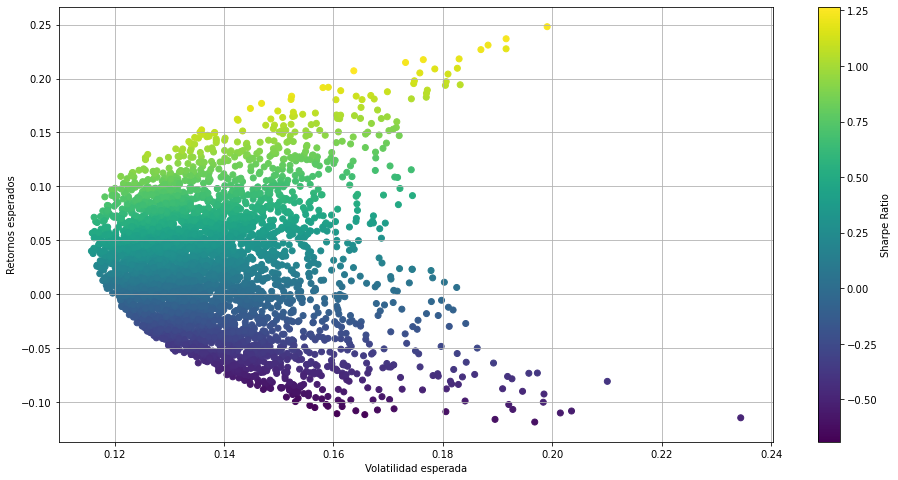

In [28]:
plt.figure(figsize=(16,8))   #Creamos una figura
plt.scatter(pvols, pretlog, c=pretlog / pvols, marker = 'o')  #Grafica de dispersión, con las volatilidades, y retornos.
plt.grid(True)
plt.xlabel('Volatilidad esperada')   #Nombre del eje x
plt.ylabel('Retornos esperados')    #Nombre del eje y
plt.colorbar(cmap ='plasma' , label = 'Sharpe Ratio')  #Color de la barra y su nombre
plt.show()

**En está figura podemos observar los 4,000 portafolios aleatorios que creamos (montecarlo), y podemos observar los porcentajes de retorno esperados, y compararlos con la volatilidad, y elegir el que más nos convenga.**

**Conclusiones**
* Las simulaciones nos ayudan a proyectar escenarios un determinado número de veces para tomar una decisión conveniente
* Se pueden aplicar a distintos campos de estudio
* Podemos complementar información aprendida en el curso e investigar librerías de apoyo para una mejor presentación del trabajo
* En esta ocasión la simulación montecarlo nos sirvió para calcular el rendimiento esperado de un portafolio

**Bibliografía:**

A. (2019). ¿Qué es un portafolio de inversión financiera? Grupo Financiero Monex. https://blog.monex.com.mx/que-es-un-portafolio-de-inversion-financiera
Colaboradores de Wikipedia. (2020, 4 agosto). Ratio de Sharpe. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Ratio_de_Sharpe